<a href="https://colab.research.google.com/github/Marcio26Mallqui/Proyectos_freecodecamp/blob/main/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [91]:
# The number of page views each day on the freeCodeCamp.org forum
# from 2016-05-09 to 2019-12-03.
df = pd.read_csv('fcc-forum-pageviews.csv', delimiter = ',', parse_dates= ['date'])
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


In [93]:
df.shape

(1304, 2)

In [94]:
df_trabajo = df.copy()
df_trabajo.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [95]:
df_trabajo['value'].describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [96]:
# filtering out days when the page views were in the top 2.5% of the
# dataset or bottom 2.5% of the dataset.
df_trabajo = df_trabajo[(df_trabajo['value'] > df_trabajo['value'].quantile(0.025)) & (df_trabajo['value'] < df_trabajo['value'].quantile(0.975))]
df_trabajo.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [97]:
df_trabajo.isnull().sum()

,0
date,0
value,0


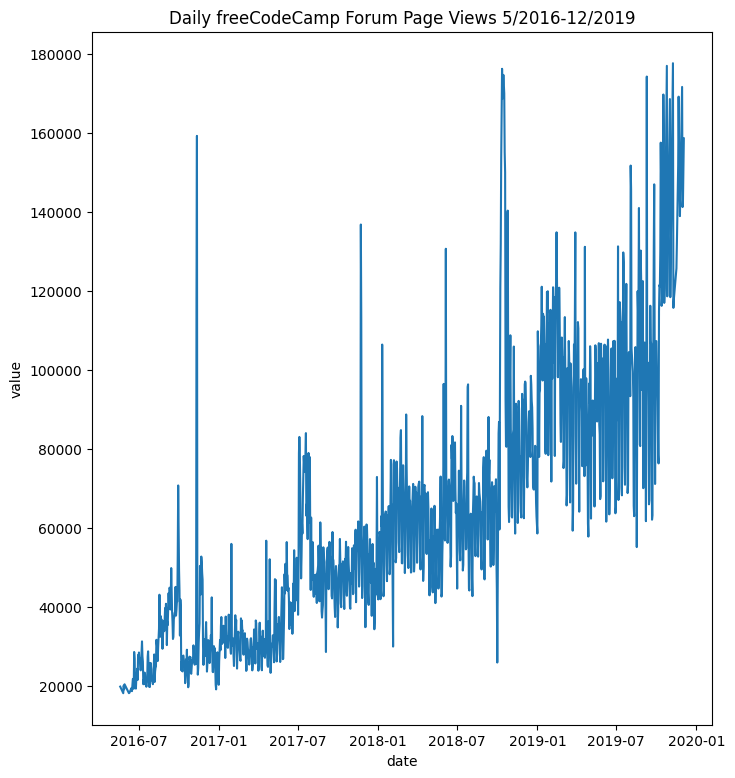

In [98]:
plt.figure(figsize=(8,9))
sns.lineplot(df_trabajo, x='date', y= 'value')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show();

In [99]:
 df_trabajo['year']= df_trabajo['date'].dt.year


In [100]:
df_trabajo['month'] = df_trabajo['date'].dt.month


In [101]:
df_trabajo

,date,value,year,month
10,2016-05-19,19736,2016,5
17,2016-05-26,18060,2016,5
18,2016-05-27,19997,2016,5
19,2016-05-28,19044,2016,5
20,2016-05-29,20325,2016,5
...,...,...,...,...
1294,2019-11-24,138875,2019,11
1299,2019-11-29,171584,2019,11
1300,2019-11-30,141161,2019,11
1301,2019-12-01,142918,2019,12


In [102]:
newdftrabajo1 = pd.DataFrame({'year' : df_trabajo['year'], 'month': df_trabajo['month'], 'value' : df_trabajo['value']})
newdftrabajo1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 10 to 1303
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    1238 non-null   int32
 1   month   1238 non-null   int32
 2   value   1238 non-null   int64
dtypes: int32(2), int64(1)
memory usage: 29.0 KB


In [103]:
newdftrabajo1 = newdftrabajo1.groupby(['year', 'month']).mean()
newdftrabajo1 = newdftrabajo1.reset_index()
newdftrabajo1 = newdftrabajo1.rename(columns={'value': 'Average Page Views'})

In [104]:
newdftrabajo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                44 non-null     int32  
 1   month               44 non-null     int32  
 2   Average Page Views  44 non-null     float64
dtypes: float64(1), int32(2)
memory usage: 832.0 bytes


In [105]:
newdftrabajo1

,year,month,Average Page Views
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [106]:
newdftrabajo1['month'] = newdftrabajo1['month'].astype(str)

In [107]:
newdftrabajo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                44 non-null     int32  
 1   month               44 non-null     object 
 2   Average Page Views  44 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1008.0+ bytes


<Axes: xlabel='year', ylabel='Average Page Views'>

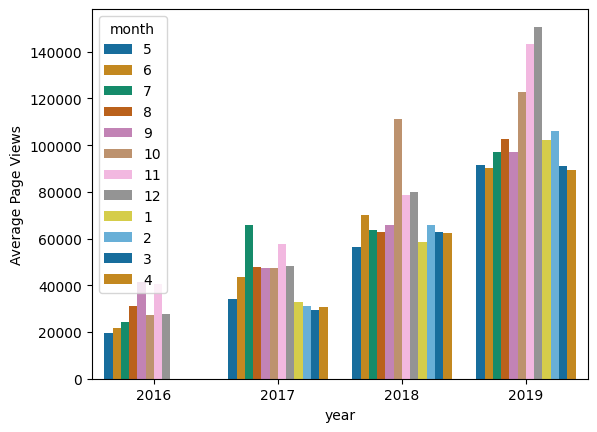

In [108]:
sns.barplot(newdftrabajo1, x='year', y='Average Page Views', hue='month', palette= 'colorblind')

In [109]:
df_trabajo

,date,value,year,month
10,2016-05-19,19736,2016,5
17,2016-05-26,18060,2016,5
18,2016-05-27,19997,2016,5
19,2016-05-28,19044,2016,5
20,2016-05-29,20325,2016,5
...,...,...,...,...
1294,2019-11-24,138875,2019,11
1299,2019-11-29,171584,2019,11
1300,2019-11-30,141161,2019,11
1301,2019-12-01,142918,2019,12


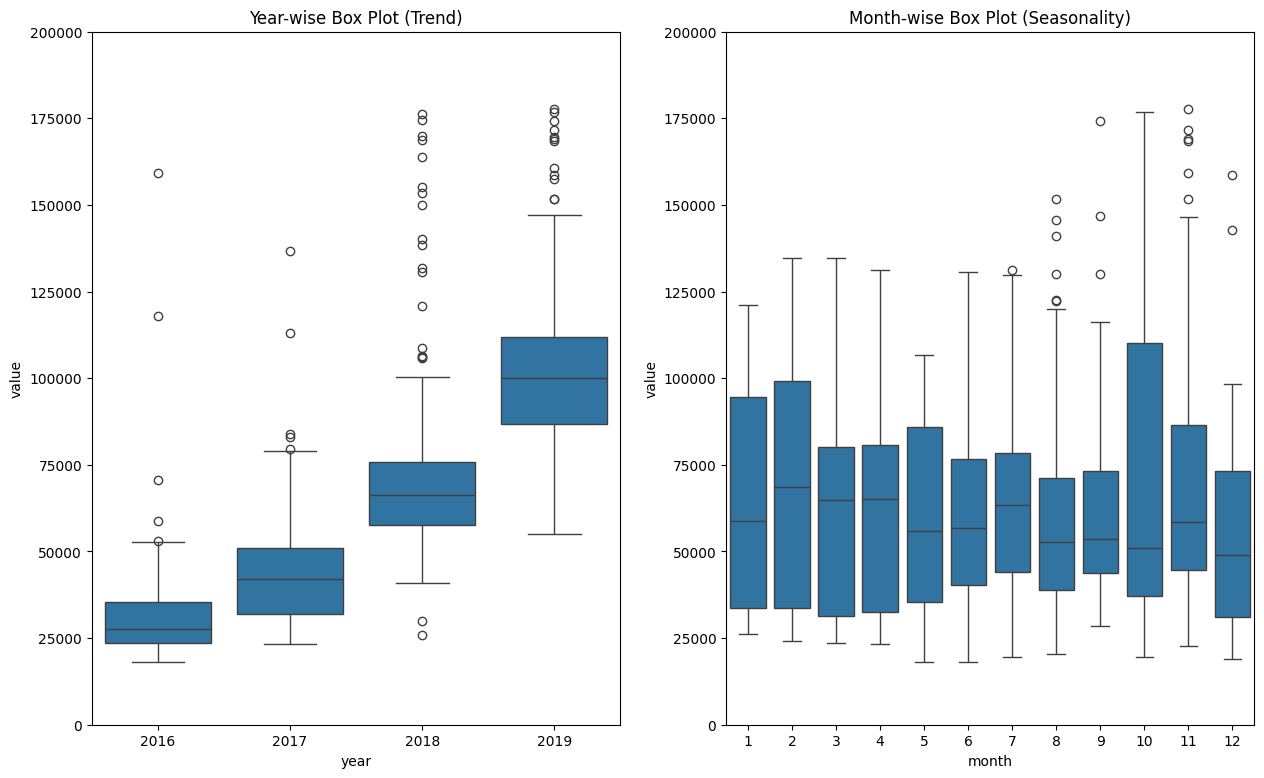

In [111]:
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
sns.boxplot(df_trabajo, x= 'year', y = 'value')
plt.title('Year-wise Box Plot (Trend)')
plt.ylim(0, 200000)
plt.subplot(1,2,2)
sns.boxplot(df_trabajo, x= 'month', y = 'value')
plt.title('Month-wise Box Plot (Seasonality)')
plt.ylim(0, 200000)
plt.show();